Problem statement: To build a CNN based model which can accurately detect melanoma. Melanoma is a type of cancer that can be deadly if not detected early. It accounts for 75% of skin cancer deaths. A solution which can evaluate images and alert the dermatologists about the presence of melanoma has the potential to reduce a lot of manual effort needed in diagnosis.

### Importing Skin Cancer Data
#### To do: Take necessary actions to read the data

### Importing all the important libraries

In [1]:
import pathlib
import tensorflow as tf
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import os
import PIL
from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras.models import Sequential

In [2]:
## If you are using the data by mounting the google drive, use the following :
from google.colab import drive
drive.mount('/content/gdrive')

##Ref:https://towardsdatascience.com/downloading-datasets-into-google-drive-via-google-colab-bcb1b30b0166

Mounted at /content/gdrive


In [3]:
!unzip gdrive/MyDrive/CNN_assignment.zip

Archive:  gdrive/MyDrive/CNN_assignment.zip
  inflating: Skin cancer ISIC The International Skin Imaging Collaboration/Test/actinic keratosis/ISIC_0010512.jpg  
  inflating: Skin cancer ISIC The International Skin Imaging Collaboration/Test/actinic keratosis/ISIC_0010889.jpg  
  inflating: Skin cancer ISIC The International Skin Imaging Collaboration/Test/actinic keratosis/ISIC_0024468.jpg  
  inflating: Skin cancer ISIC The International Skin Imaging Collaboration/Test/actinic keratosis/ISIC_0024470.jpg  
  inflating: Skin cancer ISIC The International Skin Imaging Collaboration/Test/actinic keratosis/ISIC_0024511.jpg  
  inflating: Skin cancer ISIC The International Skin Imaging Collaboration/Test/actinic keratosis/ISIC_0024646.jpg  
  inflating: Skin cancer ISIC The International Skin Imaging Collaboration/Test/actinic keratosis/ISIC_0024654.jpg  
  inflating: Skin cancer ISIC The International Skin Imaging Collaboration/Test/actinic keratosis/ISIC_0024707.jpg  
  inflating: Skin ca

This assignment uses a dataset of about 2357 images of skin cancer types. The dataset contains 9 sub-directories in each train and test subdirectories. The 9 sub-directories contains the images of 9 skin cancer types respectively.

In [4]:
# Defining the path for train and test images
## Todo: Update the paths of the train and test dataset
data_dir_train = pathlib.Path("Skin cancer ISIC The International Skin Imaging Collaboration/Train")
data_dir_test = pathlib.Path('Skin cancer ISIC The International Skin Imaging Collaboration/Test')

In [5]:
image_count_train = len(list(data_dir_train.glob('*/*.jpg')))
print(image_count_train)
image_count_test = len(list(data_dir_test.glob('*/*.jpg')))
print(image_count_test)

2239
118


### Load using keras.preprocessing

Let's load these images off disk using the helpful image_dataset_from_directory utility.

### Create a dataset

Define some parameters for the loader:

In [6]:
batch_size = 32
img_height = 180
img_width = 180

Use 80% of the images for training, and 20% for validation.

In [7]:
## Write your train dataset here
## Note use seed=123 while creating your dataset using tf.keras.preprocessing.image_dataset_from_directory
## Note, make sure your resize your images to the size img_height*img_width, while writting the dataset
train_ds = tf.keras.preprocessing.image_dataset_from_directory(
    data_dir_train,
    seed = 123,
    validation_split = 0.2,
    subset = 'training',
    image_size = (img_height,img_width),
    batch_size = batch_size
)

Found 2239 files belonging to 9 classes.
Using 1792 files for training.


In [8]:
## Write your validation dataset here
## Note use seed=123 while creating your dataset using tf.keras.preprocessing.image_dataset_from_directory
## Note, make sure your resize your images to the size img_height*img_width, while writting the dataset
val_ds = tf.keras.preprocessing.image_dataset_from_directory(
    data_dir_train,
    seed = 123,
    validation_split = 0.2,
    subset = 'validation',
    image_size = (img_height,img_width),
    batch_size = batch_size
)

Found 2239 files belonging to 9 classes.
Using 447 files for validation.


In [9]:
# List out all the classes of skin cancer and store them in a list. 
# You can find the class names in the class_names attribute on these datasets. 
# These correspond to the directory names in alphabetical order.
class_names = train_ds.class_names
print(class_names)
print(len(class_names))

['actinic keratosis', 'basal cell carcinoma', 'dermatofibroma', 'melanoma', 'nevus', 'pigmented benign keratosis', 'seborrheic keratosis', 'squamous cell carcinoma', 'vascular lesion']
9


### Visualize the data
#### Todo, create a code to visualize one instance of all the nine classes present in the dataset

In [10]:
#creating a directory of 9 images from different classes
dataset3 = train_ds.take(9)
print(list(dataset3.as_numpy_iterator()))

[(array([[[[ 53.041668 ,  34.375    ,  53.541668 ],
         [ 66.25     ,  43.25     ,  64.375    ],
         [ 75.916664 ,  53.041664 ,  74.625    ],
         ...,
         [102.791595 ,  74.5      ,  97.37503  ],
         [101.       ,  67.5      ,  91.625    ],
         [ 89.41672  ,  61.291702 ,  84.16669  ]],

        [[ 55.625    ,  37.666664 ,  58.541664 ],
         [ 70.25     ,  45.375    ,  66.625    ],
         [ 81.541664 ,  56.166664 ,  77.45833  ],
         ...,
         [106.58331  ,  77.       , 100.79166  ],
         [102.625    ,  71.375    ,  93.75     ],
         [ 92.41672  ,  63.125015 ,  86.70839  ]],

        [[ 63.833332 ,  38.75     ,  60.       ],
         [ 74.       ,  48.375    ,  69.125    ],
         [ 82.       ,  56.791664 ,  78.166664 ],
         ...,
         [110.00006  ,  80.208405 , 103.79172  ],
         [105.       ,  73.75     ,  97.5      ],
         [ 94.50015  ,  65.25006  ,  90.79176  ]],

        ...,

        [[ 50.083332 ,  28.333334 , 

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:8: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  


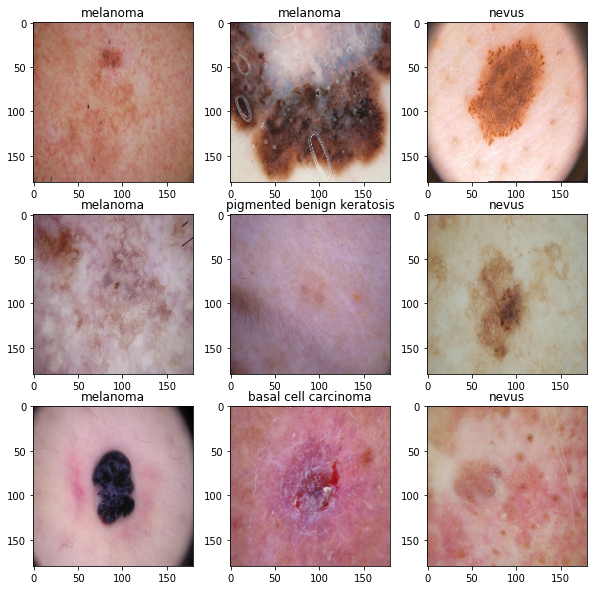

In [11]:
import matplotlib.pyplot as plt

plt.figure(figsize= [10,10])  


for i in range(9):
  for images,labels in dataset3:
    plt.subplot(3,3,i+1)
    plt.imshow(images[0].numpy().astype("uint8"));
    plt.title(class_names[labels[i]])
  

The `image_batch` is a tensor of the shape `(32, 180, 180, 3)`. This is a batch of 32 images of shape `180x180x3` (the last dimension refers to color channels RGB). The `label_batch` is a tensor of the shape `(32,)`, these are corresponding labels to the 32 images.

`Dataset.cache()` keeps the images in memory after they're loaded off disk during the first epoch.

`Dataset.prefetch()` overlaps data preprocessing and model execution while training.

In [12]:
AUTOTUNE = tf.data.experimental.AUTOTUNE
train_ds = train_ds.cache().shuffle(1000).prefetch(buffer_size=AUTOTUNE)
val_ds = val_ds.cache().prefetch(buffer_size=AUTOTUNE)

### Create the model
#### Todo: Create a CNN model, which can accurately detect 9 classes present in the dataset. Use ```layers.experimental.preprocessing.Rescaling``` to normalize pixel values between (0,1). The RGB channel values are in the `[0, 255]` range. This is not ideal for a neural network. Here, it is good to standardize values to be in the `[0, 1]`

In [13]:
### Your code goes here
from tensorflow.keras.layers import Dense, Dropout, Activation, Flatten
from tensorflow.keras.layers import BatchNormalization
from tensorflow.keras.layers import Conv2D, MaxPooling2D
from tensorflow.keras.regularizers import l2

num_classes = 9
model = Sequential([
                    layers.experimental.preprocessing.Rescaling(1./255,input_shape = (img_height,img_width,3))])
                    
model.add(Conv2D(64, (3, 3), padding='same'))
model.add(Activation('relu'))
model.add(BatchNormalization())
model.add(Conv2D(64, (3, 3)))
model.add(Activation('relu'))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.25))

model.add(Conv2D(128, (3, 3), padding='same'))
model.add(Activation('relu'))
model.add(BatchNormalization())
model.add(Conv2D(128, (3, 3)))
model.add(Activation('relu'))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.25))

model.add(Flatten())
model.add(Dense(512,kernel_regularizer=l2(0.01)))
model.add(Activation('relu'))
model.add(Dropout(0.5))
model.add(Dense(num_classes))
model.add(Activation('softmax'))

### Compile the model
Choose an appropirate optimiser and loss function for model training 

In [14]:
### Todo, choose an appropirate optimiser and loss function
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

In [15]:
# View the summary of all layers
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
rescaling (Rescaling)        (None, 180, 180, 3)       0         
_________________________________________________________________
conv2d (Conv2D)              (None, 180, 180, 64)      1792      
_________________________________________________________________
activation (Activation)      (None, 180, 180, 64)      0         
_________________________________________________________________
batch_normalization (BatchNo (None, 180, 180, 64)      256       
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 178, 178, 64)      36928     
_________________________________________________________________
activation_1 (Activation)    (None, 178, 178, 64)      0         
_________________________________________________________________
batch_normalization_1 (Batch (None, 178, 178, 64)      2

### Train the model

In [16]:
epochs = 20
history = model.fit(
  train_ds,
     batch_size=batch_size, 
     validation_data=val_ds,
     epochs=20
)

Epoch 1/20
56/56 [==============================] - 63s 318ms/step - loss: 142.8903 - accuracy: 0.2512 - val_loss: 104.8960 - val_accuracy: 0.1499
Epoch 2/20
56/56 [==============================] - 13s 225ms/step - loss: 92.3881 - accuracy: 0.3477 - val_loss: 117.1299 - val_accuracy: 0.0694
Epoch 3/20
56/56 [==============================] - 13s 226ms/step - loss: 53.9180 - accuracy: 0.1934 - val_loss: 85.3479 - val_accuracy: 0.1969
Epoch 4/20
56/56 [==============================] - 13s 227ms/step - loss: 37.7788 - accuracy: 0.2752 - val_loss: 62.7796 - val_accuracy: 0.1991
Epoch 5/20
56/56 [==============================] - 13s 230ms/step - loss: 25.7834 - accuracy: 0.2567 - val_loss: 46.2114 - val_accuracy: 0.1790
Epoch 6/20
56/56 [==============================] - 13s 230ms/step - loss: 17.5169 - accuracy: 0.3085 - val_loss: 30.0717 - val_accuracy: 0.1521
Epoch 7/20
56/56 [==============================] - 13s 229ms/step - loss: 12.0089 - accuracy: 0.2547 - val_loss: 15.0847 - val

### Visualizing training results

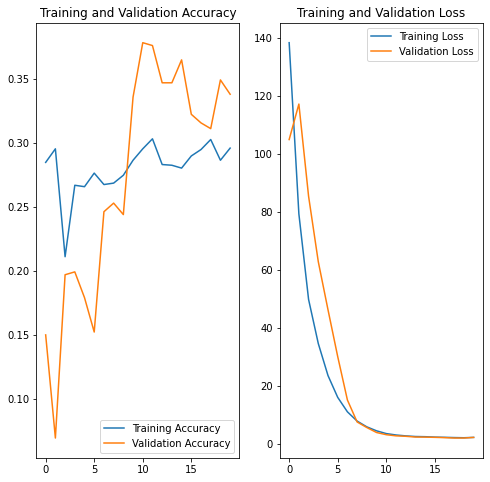

In [17]:
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

loss = history.history['loss']
val_loss = history.history['val_loss']

epochs_range = range(epochs)

plt.figure(figsize=(8, 8))
plt.subplot(1, 2, 1)
plt.plot(epochs_range, acc, label='Training Accuracy')
plt.plot(epochs_range, val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')

plt.subplot(1, 2, 2)
plt.plot(epochs_range, loss, label='Training Loss')
plt.plot(epochs_range, val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')
plt.show()

#### Todo: Write your findings after the model fit, see if there is an evidence of model overfit or underfit

### Write your findings here

The training accuracy indicates the model is underfitting. We want the training accuracy and validation accuracy to increase. The training and validation loss is dropping which means the model is getting more and more confident in the wrong predictions. Therfore a different set of hyperparameters and loss function can improve the performance. I used 3 different architectures much to my disappointment since all of them underfitted. This seems to be a common trend no matter the architecture of the CNN. 

In [18]:
# Todo, after you have analysed the model fit history for presence of underfit or overfit, choose an appropriate data augumentation strategy. 
# Your code goes here
from tensorflow.keras.layers.experimental import preprocessing
 
data_aug = tf.keras.Sequential([
                             layers.experimental.preprocessing.RandomFlip(mode = "horizontal",input_shape = (img_height,img_width,3)),
                             layers.experimental.preprocessing.RandomRotation(0.2, fill_mode = 'reflect'),
                             layers.experimental.preprocessing.RandomZoom(height_factor = (0.2,0.3),width_factor = (0.2,0.3),fill_mode = 'reflect'),
                             tf.keras.layers.experimental.preprocessing.RandomTranslation(height_factor=(-0.2, 0.3),width_factor=(-0.2, 0.3),fill_mode='reflect')

])

In [19]:
dataset4 = train_ds.take(9)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:8: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  


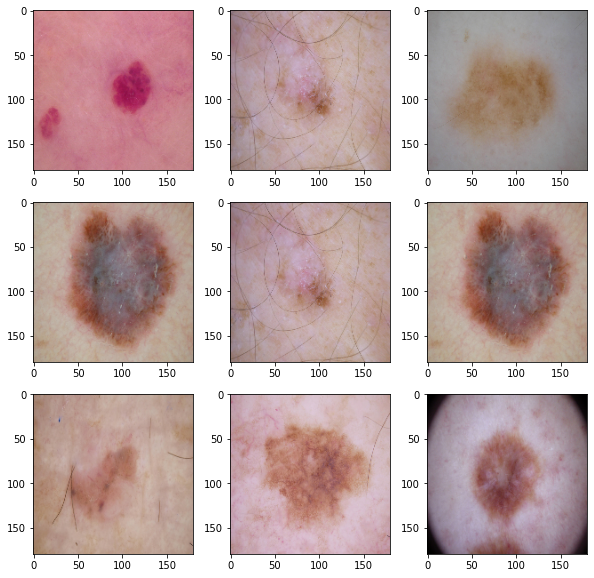

In [20]:
# Todo, visualize how your augmentation strategy works for one instance of training image.
# Your code goes here
plt.figure(figsize= [10,10])  


for i in range(9):
  for images,labels in dataset4:
    plt.subplot(3,3,i+1)
    plt.imshow(images[0].numpy().astype("uint8"));


### Todo:
### Create the model, compile and train the model


In [21]:
## You can use Dropout layer if there is an evidence of overfitting in your findings
# model is underfitting hence removing the dropouts
model = Sequential([data_aug,
                    layers.experimental.preprocessing.Rescaling(1./255,input_shape = (img_height,img_width,3))])
                    
model.add(Conv2D(64, (3, 3), padding='same'))
model.add(Activation('relu'))
model.add(BatchNormalization())
model.add(Conv2D(64, (3, 3)))
model.add(Activation('relu'))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2, 2)))

model.add(Conv2D(128, (3, 3), padding='same'))
model.add(Activation('relu'))
model.add(BatchNormalization())
model.add(Conv2D(128, (3, 3)))
model.add(Activation('relu'))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2, 2)))

model.add(Flatten())
model.add(Dense(512,kernel_regularizer=l2(0.01)))
model.add(Activation('relu'))
model.add(Dense(num_classes))
model.add(Activation('softmax'))
## Your code goes here



### Compiling the model

In [22]:
## Your code goes here
model.compile(optimizer='sgd',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

### Training the model

In [23]:
## Your code goes here, note: train your model for 20 epochs
epochs = 20
history = model.fit(
  train_ds,
     batch_size=batch_size, 
     validation_data=val_ds,
     epochs=20
)

Epoch 1/20
56/56 [==============================] - 14s 218ms/step - loss: 22.4867 - accuracy: 0.2626 - val_loss: 16.7122 - val_accuracy: 0.1477
Epoch 2/20
56/56 [==============================] - 12s 216ms/step - loss: 11.7187 - accuracy: 0.4142 - val_loss: 19.4990 - val_accuracy: 0.1790
Epoch 3/20
56/56 [==============================] - 12s 216ms/step - loss: 11.4285 - accuracy: 0.4075 - val_loss: 18.7666 - val_accuracy: 0.1991
Epoch 4/20
56/56 [==============================] - 12s 215ms/step - loss: 11.1842 - accuracy: 0.4351 - val_loss: 19.2394 - val_accuracy: 0.2349
Epoch 5/20
56/56 [==============================] - 12s 214ms/step - loss: 10.9254 - accuracy: 0.4362 - val_loss: 17.6254 - val_accuracy: 0.2394
Epoch 6/20
56/56 [==============================] - 12s 214ms/step - loss: 10.6473 - accuracy: 0.4830 - val_loss: 15.3123 - val_accuracy: 0.2550
Epoch 7/20
56/56 [==============================] - 12s 214ms/step - loss: 10.3864 - accuracy: 0.4915 - val_loss: 12.9107 - val_ac

### Visualizing the results

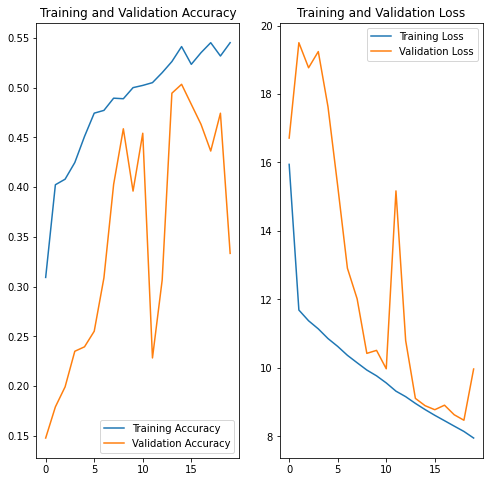

In [24]:
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

loss = history.history['loss']
val_loss = history.history['val_loss']

epochs_range = range(epochs)

plt.figure(figsize=(8, 8))
plt.subplot(1, 2, 1)
plt.plot(epochs_range, acc, label='Training Accuracy')
plt.plot(epochs_range, val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')

plt.subplot(1, 2, 2)
plt.plot(epochs_range, loss, label='Training Loss')
plt.plot(epochs_range, val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')
plt.show()

#### Todo: Write your findings after the model fit, see if there is an evidence of model overfit or underfit. Do you think there is some improvement now as compared to the previous model run?

*The only noticeable improvement is that the training accuracy was around 0.3 in the previous model and in this one, it was improved by 0.2. Since the accuracy training and validation both are around 0.5.*

#### **Todo:** Find the distribution of classes in the training dataset.
#### **Context:** Many times real life datasets can have class imbalance, one class can have proportionately higher number of samples compared to the others. Class imbalance can have a detrimental effect on the final model quality. Hence as a sanity check it becomes important to check what is the distribution of classes in the data.

In [25]:
## Your code goes here.
import glob
import os
train_image_names = [x for x in glob.glob(os.path.join(data_dir_train,'*','*.jpg'))]
train_image_names = pd.Series(train_image_names)
print(train_image_names)


0       Skin cancer ISIC The International Skin Imagin...
1       Skin cancer ISIC The International Skin Imagin...
2       Skin cancer ISIC The International Skin Imagin...
3       Skin cancer ISIC The International Skin Imagin...
4       Skin cancer ISIC The International Skin Imagin...
                              ...                        
2234    Skin cancer ISIC The International Skin Imagin...
2235    Skin cancer ISIC The International Skin Imagin...
2236    Skin cancer ISIC The International Skin Imagin...
2237    Skin cancer ISIC The International Skin Imagin...
2238    Skin cancer ISIC The International Skin Imagin...
Length: 2239, dtype: object


In [26]:
train_df = pd.DataFrame()
train_df['Filename'] = train_image_names.map(lambda img_name: img_name.split("/")[-1])

# generate ClassId field
train_df['ClassId'] = train_image_names.map(lambda img_name: img_name.split("/")[-2])

train_df.head()

,Filename,ClassId
0,ISIC_0025144.jpg,basal cell carcinoma
1,ISIC_0027004.jpg,basal cell carcinoma
2,ISIC_0026855.jpg,basal cell carcinoma
3,ISIC_0028980.jpg,basal cell carcinoma
4,ISIC_0026321.jpg,basal cell carcinoma


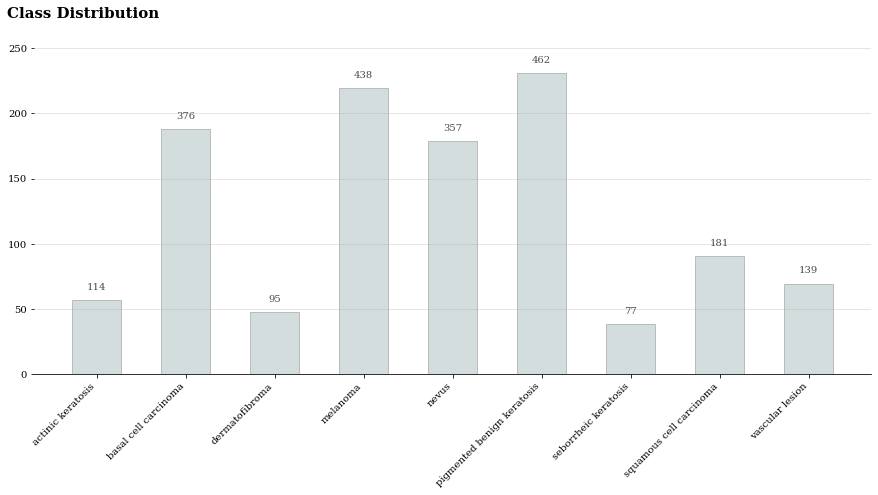

In [27]:
fig, ax = plt.subplots(1,1,figsize=(15,6))
data_q1 = train_df['ClassId'].value_counts().sort_index()
ax.bar(data_q1.index, data_q1, width=0.55, edgecolor = 'darkgray', color = '#d4dddd',
      linewidth = 0.7)

for i in data_q1.index:
    ax.annotate(f"{data_q1[i]}", 
                xy = (i, data_q1[i] + 20),
               va = 'center', ha = 'center', fontweight = 'light', fontfamily = 'serif',
               color ='#4a4a4a')
for s in ['top', 'left', 'right']:
    ax.spines[s].set_visible(False)

ax.set_ylim(0,500)
ax.set_xticklabels(data_q1.index, fontfamily = 'serif',rotation = 45, ha="right")
ax.set_yticklabels(np.arange(0,500,50), fontfamily = 'serif')
fig.text(0.1,0.95, 'Class Distribution', fontsize = '15',fontweight = 'bold',fontfamily = 'serif')
ax.grid(axis = 'y',linestyle = '-', alpha = 0.4)
plt.show()

#### **Todo:** Write your findings here: 
#### - Which class has the least number of samples?
#### *Seborrheic Keratosis* has the least number of samples, the number being 77.
#### - Which classes dominate the data in terms proportionate number of samples?
#### *Pigmented Benign Keratosis* has the highest number of samples 462, followed by *Melanoma* (438) hence dominating the data in terms of samples.


#### **Todo:** Rectify the class imbalance
#### **Context:** You can use a python package known as `Augmentor` (https://augmentor.readthedocs.io/en/master/) to add more samples across all classes so that none of the classes have very few samples.

In [28]:
!pip install Augmentor

To use `Augmentor`, the following general procedure is followed:

1. Instantiate a `Pipeline` object pointing to a directory containing your initial image data set.<br>
2. Define a number of operations to perform on this data set using your `Pipeline` object.<br>
3. Execute these operations by calling the `Pipeline’s` `sample()` method.


In [29]:
path_to_training_dataset="Skin cancer ISIC The International Skin Imaging Collaboration/Train/"
import Augmentor
for i in class_names:
    p = Augmentor.Pipeline(path_to_training_dataset + i)
    p.rotate(probability=0.7, max_left_rotation=10, max_right_rotation=10)
    p.sample(500) ## We are adding 500 samples per class to make sure that none of the classes are sparse.

Executing Pipeline:   0%|          | 0/500 [00:00<?, ? Samples/s]

Initialised with 114 image(s) found.
Output directory set to Skin cancer ISIC The International Skin Imaging Collaboration/Train/actinic keratosis/output.

Processing <PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=600x450 at 0x7F9DC0414D10>: 100%|██████████| 500/500 [00:15<00:00, 31.31 Samples/s]
Processing <PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=600x450 at 0x7F9DC0F8AF10>:   0%|          | 2/500 [00:00<00:27, 18.30 Samples/s]

Initialised with 376 image(s) found.
Output directory set to Skin cancer ISIC The International Skin Imaging Collaboration/Train/basal cell carcinoma/output.

Processing <PIL.Image.Image image mode=RGB size=600x450 at 0x7F9DC0F08B90>: 100%|██████████| 500/500 [00:15<00:00, 31.57 Samples/s]
Executing Pipeline:   0%|          | 0/500 [00:00<?, ? Samples/s]

Initialised with 95 image(s) found.
Output directory set to Skin cancer ISIC The International Skin Imaging Collaboration/Train/dermatofibroma/output.

Processing <PIL.Image.Image image mode=RGB size=600x450 at 0x7F9DC041CA90>: 100%|██████████| 500/500 [00:16<00:00, 30.83 Samples/s]
Executing Pipeline:   0%|          | 0/500 [00:00<?, ? Samples/s]

Initialised with 438 image(s) found.
Output directory set to Skin cancer ISIC The International Skin Imaging Collaboration/Train/melanoma/output.

Processing <PIL.Image.Image image mode=RGB size=1024x768 at 0x7F9DC3E7D450>: 100%|██████████| 500/500 [01:28<00:00,  5.64 Samples/s]
Processing <PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=600x450 at 0x7F9DC041C190>:   0%|          | 1/500 [00:00<01:21,  6.09 Samples/s]

Initialised with 357 image(s) found.
Output directory set to Skin cancer ISIC The International Skin Imaging Collaboration/Train/nevus/output.

Processing <PIL.Image.Image image mode=RGB size=1504x1129 at 0x7F9DC04A4710>: 100%|██████████| 500/500 [01:25<00:00,  5.88 Samples/s]
Processing <PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=600x450 at 0x7F9DC0F922D0>:   0%|          | 1/500 [00:00<00:52,  9.50 Samples/s]

Initialised with 462 image(s) found.
Output directory set to Skin cancer ISIC The International Skin Imaging Collaboration/Train/pigmented benign keratosis/output.

Processing <PIL.Image.Image image mode=RGB size=600x450 at 0x7F9DC04B3050>: 100%|██████████| 500/500 [00:16<00:00, 30.66 Samples/s]
Processing <PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=1024x768 at 0x7F9DC03BF650>:   0%|          | 1/500 [00:00<01:05,  7.67 Samples/s]

Initialised with 77 image(s) found.
Output directory set to Skin cancer ISIC The International Skin Imaging Collaboration/Train/seborrheic keratosis/output.

Processing <PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=1024x768 at 0x7F9E751D2E10>: 100%|██████████| 500/500 [00:39<00:00, 12.56 Samples/s]
Executing Pipeline:   0%|          | 0/500 [00:00<?, ? Samples/s]

Initialised with 181 image(s) found.
Output directory set to Skin cancer ISIC The International Skin Imaging Collaboration/Train/squamous cell carcinoma/output.

Processing <PIL.Image.Image image mode=RGB size=600x450 at 0x7F9DC0485D50>: 100%|██████████| 500/500 [00:15<00:00, 32.10 Samples/s]
Executing Pipeline:   0%|          | 0/500 [00:00<?, ? Samples/s]

Initialised with 139 image(s) found.
Output directory set to Skin cancer ISIC The International Skin Imaging Collaboration/Train/vascular lesion/output.

Processing <PIL.Image.Image image mode=RGB size=600x450 at 0x7F9E12F04610>: 100%|██████████| 500/500 [00:16<00:00, 30.75 Samples/s]


Augmentor has stored the augmented images in the output sub-directory of each of the sub-directories of skin cancer types.. Lets take a look at total count of augmented images.

In [30]:
image_count_train = len(list(data_dir_train.glob('*/output/*.jpg')))
print(image_count_train)

4500


### Lets see the distribution of augmented data after adding new images to the original training data.

In [31]:
import glob
import os
path_list = [x for x in glob.glob(os.path.join(data_dir_train, '*','output', '*.jpg'))]
path_list

['Skin cancer ISIC The International Skin Imaging Collaboration/Train/basal cell carcinoma/output/basal cell carcinoma_original_ISIC_0027146.jpg_1a94ea93-142d-4c15-90f9-8d395c044c0d.jpg',
 'Skin cancer ISIC The International Skin Imaging Collaboration/Train/basal cell carcinoma/output/basal cell carcinoma_original_ISIC_0031585.jpg_f8afc08a-513e-480f-99d4-ad6fe9e9c34e.jpg',
 'Skin cancer ISIC The International Skin Imaging Collaboration/Train/basal cell carcinoma/output/basal cell carcinoma_original_ISIC_0026230.jpg_8a160708-ab31-48b5-9097-69b10db5e7b4.jpg',
 'Skin cancer ISIC The International Skin Imaging Collaboration/Train/basal cell carcinoma/output/basal cell carcinoma_original_ISIC_0026988.jpg_d4badf1b-bc0d-43ce-8812-9b11ed7ed637.jpg',
 'Skin cancer ISIC The International Skin Imaging Collaboration/Train/basal cell carcinoma/output/basal cell carcinoma_original_ISIC_0026117.jpg_4404899d-e7f2-4464-987c-ecf9896b518a.jpg',
 'Skin cancer ISIC The International Skin Imaging Collaborat

In [32]:
lesion_list_new = [os.path.basename(os.path.dirname(os.path.dirname(y))) for y in glob.glob(os.path.join(data_dir_train, '*','output', '*.jpg'))]
lesion_list_new

['basal cell carcinoma',
 'basal cell carcinoma',
 'basal cell carcinoma',
 'basal cell carcinoma',
 'basal cell carcinoma',
 'basal cell carcinoma',
 'basal cell carcinoma',
 'basal cell carcinoma',
 'basal cell carcinoma',
 'basal cell carcinoma',
 'basal cell carcinoma',
 'basal cell carcinoma',
 'basal cell carcinoma',
 'basal cell carcinoma',
 'basal cell carcinoma',
 'basal cell carcinoma',
 'basal cell carcinoma',
 'basal cell carcinoma',
 'basal cell carcinoma',
 'basal cell carcinoma',
 'basal cell carcinoma',
 'basal cell carcinoma',
 'basal cell carcinoma',
 'basal cell carcinoma',
 'basal cell carcinoma',
 'basal cell carcinoma',
 'basal cell carcinoma',
 'basal cell carcinoma',
 'basal cell carcinoma',
 'basal cell carcinoma',
 'basal cell carcinoma',
 'basal cell carcinoma',
 'basal cell carcinoma',
 'basal cell carcinoma',
 'basal cell carcinoma',
 'basal cell carcinoma',
 'basal cell carcinoma',
 'basal cell carcinoma',
 'basal cell carcinoma',
 'basal cell carcinoma',


In [33]:
dataframe_dict_new = dict(zip(path_list, lesion_list_new))

In [34]:
df2 = pd.DataFrame(list(dataframe_dict_new.items()),columns = ['Filename','ClassId'])
new_df = train_df.append(df2)
new_df.head()

,Filename,ClassId
0,ISIC_0025144.jpg,basal cell carcinoma
1,ISIC_0027004.jpg,basal cell carcinoma
2,ISIC_0026855.jpg,basal cell carcinoma
3,ISIC_0028980.jpg,basal cell carcinoma
4,ISIC_0026321.jpg,basal cell carcinoma


In [35]:
new_df.shape

(6739, 2)

In [36]:
new_df['ClassId'].value_counts()

pigmented benign keratosis    962
melanoma                      938
basal cell carcinoma          876
nevus                         857
squamous cell carcinoma       681
vascular lesion               639
actinic keratosis             614
dermatofibroma                595
seborrheic keratosis          577
Name: ClassId, dtype: int64

So, now we have added 500 images to all the classes to maintain some class balance. We can add more images as we want to improve training process.

#### **Todo**: Train the model on the data created using Augmentor

In [37]:
batch_size = 32
img_height = 180
img_width = 180

In [38]:
image_count_train_1 = len(list(glob.glob(os.path.join(data_dir_train, '*','output', '*.jpg'))))
print(image_count_train_1)

4500


In [39]:
data_dir_train_aug = pathlib.Path("Skin cancer ISIC The International Skin Imaging Collaboration/Train/*/output")

In [40]:
image_count_train_aug = len(list(data_dir_train.glob('*/*.jpg')))
print(image_count_train_aug)

2239


#### **Todo:** Create a training dataset

In [44]:
data_dir_train=pathlib.Path("Skin cancer ISIC The International Skin Imaging Collaboration/Train/")
train_ds = tf.keras.preprocessing.image_dataset_from_directory(
  data_dir_train,
  seed=123,
  validation_split = 0.2,
  subset = 'training',
  image_size=(img_height, img_width), 
  batch_size=batch_size)

Found 6739 files belonging to 9 classes.
Using 5392 files for training.


#### **Todo:** Create a validation dataset

In [45]:
val_ds = tf.keras.preprocessing.image_dataset_from_directory(
  data_dir_train,
  seed=123,
  validation_split = 0.2,
  subset = 'validation',
  image_size=(img_height, img_width),
  batch_size=batch_size)

Found 6739 files belonging to 9 classes.
Using 1347 files for validation.


#### **Todo:** Create your model (make sure to include normalization)

In [48]:
## your code goes here
from keras.layers import MaxPool2D
model = Sequential([
                    layers.experimental.preprocessing.Rescaling(1./255, input_shape=(img_height, img_width,3))
      
])
model.add(Conv2D(filters = 32, kernel_size = (5,5),padding = 'Same', 
                 activation ='relu', input_shape = (180, 180, 32)))
model.add(Conv2D(filters = 32, kernel_size = (5,5),padding = 'Same', 
                 activation ='relu'))
model.add(MaxPool2D(pool_size=(2,2)))
model.add(Conv2D(filters = 32, kernel_size = (5,5),padding = 'Same', 
                 activation ='relu'))
model.add(MaxPool2D(pool_size=(2,2)))
model.add(Conv2D(filters = 32, kernel_size = (5,5),padding = 'Same', 
                 activation ='relu'))
model.add(MaxPool2D(pool_size=(2,2)))
model.add(Dropout(0.25))


model.add(Flatten())
model.add(Dense(num_classes, activation = "softmax"))

#### **Todo:** Compile your model (Choose optimizer and loss function appropriately)

In [49]:
## your code goes here
model.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])

#### **Todo:**  Train your model

In [50]:
epochs = 50
## Your code goes here, use 50 epochs.
history = model.fit(
  train_ds,
  validation_data=val_ds,
  epochs=epochs
)# your model fit cod

Epoch 1/50
169/169 [==============================] - 43s 239ms/step - loss: 2.1684 - accuracy: 0.1570 - val_loss: 1.8362 - val_accuracy: 0.3155
Epoch 2/50
169/169 [==============================] - 39s 228ms/step - loss: 1.7148 - accuracy: 0.3399 - val_loss: 1.6173 - val_accuracy: 0.3779
Epoch 3/50
169/169 [==============================] - 40s 230ms/step - loss: 1.6383 - accuracy: 0.3795 - val_loss: 1.6758 - val_accuracy: 0.3875
Epoch 4/50
169/169 [==============================] - 41s 239ms/step - loss: 1.5477 - accuracy: 0.4058 - val_loss: 1.5708 - val_accuracy: 0.4313
Epoch 5/50
169/169 [==============================] - 40s 232ms/step - loss: 1.4155 - accuracy: 0.4628 - val_loss: 1.4408 - val_accuracy: 0.4566
Epoch 6/50
169/169 [==============================] - 40s 230ms/step - loss: 1.2961 - accuracy: 0.5064 - val_loss: 1.2149 - val_accuracy: 0.5561
Epoch 7/50
169/169 [==============================] - 40s 231ms/step - loss: 1.1273 - accuracy: 0.5900 - val_loss: 1.1371 - val_ac

#### **Todo:**  Visualize the model results

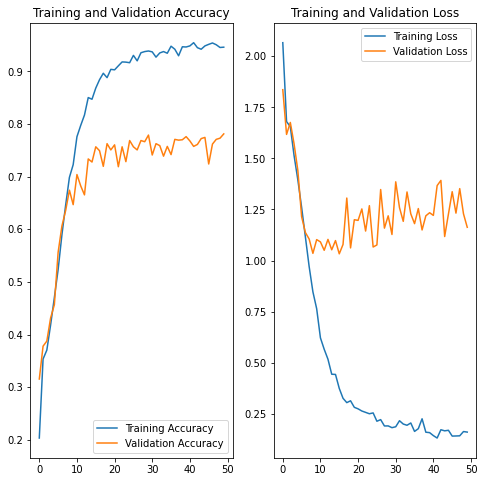

In [51]:
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

loss = history.history['loss']
val_loss = history.history['val_loss']

epochs_range = range(epochs)

plt.figure(figsize=(8, 8))
plt.subplot(1, 2, 1)
plt.plot(epochs_range, acc, label='Training Accuracy')
plt.plot(epochs_range, val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')

plt.subplot(1, 2, 2)
plt.plot(epochs_range, loss, label='Training Loss')
plt.plot(epochs_range, val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')
plt.show()

#### **Todo:**  Analyze your results here. Did you get rid of underfitting/overfitting? Did class rebalance help?



Experiment Log:
1. Since the first iterations itself including Batch Normalisation and Dropout made the model underfit with a training accuracy of ~0.3.
2. After tweaking the CNN architecture and augmenting the images, the training accuracy improved to ~0.5.
3. After resolving class imbalance issues and tweaking the CNN architecture to include Dropout only once before Flatten layer and keeping the size of the kernel and the number of filters consistent throughout the Convolutional Layers, the training accuracy significantly improved to ~0.95. 
4. Validation accuracy significantly improved to ~0.75, successfully getting rid of the underfitting issue throughout the training process. 